# 분류 모델 - logistic regression
- 종속변수가 이항분포를 따른다는 가정하에 회귀 분석과 분류 문제에 사용할 수 있다.

** 정의 **
- 로지스틱 회귀 모델은 조건부확률이 모수가 mu가 x에 의존하고, 종속변수가 이항분포를 따른다고 가정한다.
   - p(y|x) = Bin(y;mu(x), N)
- 회귀분석에 사용하는 경우
   - y 값이 특정구간 0~N 사이의 값을 갖을 수 있으므로 이러한 특성을 사용하면 회귀분석에서도 사용가능
   - y^ = mu(x)
- 분류 문제에 사용하는 경우
   - 이항분포의 종속변수의 범위 N=1인 경우 베르누이 확률분포를 따르게 된다.
   - p(y|x) = Bern(y;mu(x))
   - 이러한 경우 종속변수 y가 0, 1인 분류예측문제를 풀 수 있다.
   - mu(x)를 예측한 후 이 값이 0.5보다 큰지 작은지에 따라서 y^ 값을 구할 수 있다.
   - mu(x) >= 0.5 ---> y^ = 1
   - mu(x) < 0.5  ---> y^ = 0
   - 즉 클래스가 0, 1인 분류문제에서 y^은 mu(x)가 0.5를 기준으로 큰지 작은지에 따라서 결정 된다.
   - 회귀분석에 사용할 떄는 mu(x) 예측값 그 자체가 y^이 된다.

** 시그모이드 함수 **
- 로지스틱 회귀 모형은 모수 mu를 x의 함수라고 가장하는 것이 특징이다. mu(x)
- 이 mu(x)가 시그모이드 함수의 변형 형태이다.
- 시그모이드 함수는 
   - a,b 사이에 한정된 값을 가지고
   - 항상 양의 기울기를 갖는다. (단조증가)
- 시그모이드 함수의 종류는
   - 로지스틱 함수
   - 하이퍼볼릭탄젠트 함수
   - 오차 함수
- 시그모이드 함수는 대표적으로 로지스틱 함수를 의미한다.
   - 승산비 : 베르누이 시도에서 1이 나올 확률과 0이 나올 확률의 비율 : mu / (1-mu) : 0부터 양의 무한대
   - 로지트 함수 : 승산비를 로그 변환한 함수 : 음의 무한대에서 양의 무한대
   - 로지스틱 함수 : 로지트 함수의 역함수 : mu(z) = 1 / 1 + exp(-z) : 0~1 사이의 값
- 로지스틱 함수의 선형 판별 함수
   - z값에 따라서 mu 값이 달라지고, mu값이 0.5보다 큰지 작은지에 따라서 y^ 값이 결정된다.
      - z = 0 ---> mu(x) = 0.5
      - z > 0 ---> mu(x) > 0.5 ---> y^ = 1
      - z < 0 ---> mu(x) < 0.5 ---> y^ = 0
   - z = w^Tx (선형 함수)
   - 판별경계면(plane surface)도 선형이다.
   - 즉 선형함수인 z의 값이 0을 기준으로 어떤 값인지에 따라서 mu 값이 결정되고, 이 값이 0.5를 기준으로 어떤 값인지에 따라서 y^의 값이 결정된다. 클래스 예측값이 결정된다.

** 로지스틱 회귀분석 모형의 모수 추정 **
- 모수 w를 최대가능도 maximum likelihood estimation, MLE 방법으로 추정한다.
   - 로그가능도 함수 LL을 구한다.
      - 베르누이분포의 확률밀도함수를 구하고, 확률밀도함수에 로지스틱함수인 mu(x;w)를 대입한다.
      - LL = 확률밀도함수를 i=1~N의 값에 대해 거듭하여 곱한 후 log를 씌운 후 식을 정리한다.
      - LL을 최대화하는 w을 찾기 위해 모수 mu와 w로 미분한다.
      - mu로 미분한 식과 w로 미분한 식을 곱하여 그레디언트 벡터 수식을 구한다.
      - 그레디언트 벡터 값이 0이 되는 모수의 값이 로그가능도를 최대화하는 값이 된다.
      - 이 경우는 수치적 최적화 방법을 통해서 모수 w의 값을 구해야 한다.
   - 로그가능도 함수 LL을 최대화 하여
   - 목적함수 J를 최소화 한다.

** 로지스틱 회귀 성능 측정 **
- 맥파든 의사결정계수 값으로 측정한다.
   - R^2_pseudo = 1 - G^2 / G^2_0
   - G^2 = 현재 이탈도 = 좋은 모형일 수록 0, 안 좋은 모형일 수록 값이 커짐
   - G^2_0 = 귀무모형의 이탈도
- 맥파든 의사결정 계수
   - 성능이 좋은 경우 1, 성능이 나쁜 경우 0 

** sklearn logistic regression **
- 로지스틱 회귀 모형은 로짓링크와 이항/베르누이 조건부분포를 사용하는 일반화 선형 모델(GLM)의 특별한 경우이다.
- 최적화 방법들 solver
   - 각 인수마다 penaltie 적용 범위가 다르다. (가중치의 값이 커지거나 너무 작아지는 것을 방지하기 위함)
   - lbfgs가 기본으로 사용됨
   - 대규모 데이터 셋은 saga를 사용, 다른 분류 모델로 SGDclassifier를 사용할 수도 있다.
   - lr 모델은 클래스 0을 네거티브로 인식한다. 따라서 클래스 0인 샘플이 많은 경우 잘못된 모델이 될 수 있다. 이러한 경우 fit_intercept=True 설정하고 intercept_scailing을 늘리는 것이 좋다.
   - liblinear
      - 좌표하강(cordinate decent CD) 알고리즘 사용
      - C++의 라이브러리 사용
      - 다중 클래스에 적용할 수 없으나 OVR(일대나머지) 방법을 적용하면 가능.
      - multi_class='multinomial' 사용할 수 없다., multi_class='ovr'을 사용한다.
      - intercept_scailing 인수는 상수항을 스케일링하는 방법으로 liblinear에서만 사용할 수 있다.
   - lbfgs, nuwton-cg, sag
      - l2 정규화 페널티를 사용할 수 있다.
      - 대규모 데이터에서 빠르게 수렴한다.
      - multi_class를 multinomial으로 설정하여 다항 클래스에 사용할 수 있다. 
   - sag
      - 샘플 수와 특징값의 수가 모두 큰 규모의 데이터에서 다른 솔버보다 빠르다.
   - saga
      - sag의 변형
      - 희소 다항 로지스틱 회귀분석에 사용가능
      - elasticnet 페널티를 지원하는 솔버이다.
   - lbfgs
      - Quasi-newton 방법의 BFGS 알고리즘을 근사하는 최적화 알고리즘
      - 여러가지 데이터 셋에 적용가능하여 기본 솔버
      - 그러나 스케일이 잘 안되거나 희귀한 클래스가 있는 원핫인코딩 종속값에 대해서 성능이 떨어진다.
   - newton-cholesky
      - 헤시안 행렬을 계산하는 방식의 뉴턴 솔버
      - 특징벡터보다 샘플이 더 많은 경우 사용하면 좋다. 그러나 l2 정규화만 지원한다.
      - 헤시안 행렬 계산과정에서 메모리 사용량이 커진다?
      - 다중 클래스 문제에 사용할 경우 OVR 방식을 사용한다.
- LogisticRegressionCV는 내장된 교차검증 모듈
   - 최적의 C, l1_ratio 매개변수 값을 찾는다.

** solver 와 페널티 요약 **
- liblinear와 saga를 제외한 나머지 solver는 l2 페널티만 지원한다.
   - ‘lbfgs’ - [‘l2’, None]
   - ‘liblinear’ - [‘l1’, ‘l2’]
   - ‘newton-cg’ - [‘l2’, None]
   - ‘newton-cholesky’ - [‘l2’, None]
   - ‘sag’ - [‘l2’, None]
   - ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]

** 로지스틱 회귀 모델링 팁 **
-  multi_class 인수는 ovr과 multinomial을 사용할 수 있고, 일반적으로 multinomial이 ovr 보다 성능이 더 좋다.
- warm_start=True는 이전 호출의 솔루션을 재사용하여 초기화한다. 이어 받는다는 의미?
- 작은 규모의 데이터는 liblinear solver가 적당하다.
- 큰 규모의 데이터는 saga solver가 적당하다.
- 다항 클래스의 분류 문제의 경우 lbfgs, newton-cg, sag, saga 모델이 다항 손실을 제어한다.
- max_iter 인수는 solver 최적화 방법이 수렴하는 데 걸리는 반복횟수이다. 이것을 다르게 하면 성능이 달라질 수 있다.
- l1_ratio 인수의 값이 0~1 이려면 penalty='elasticnet' 인 경우만 사용할 수 있다. l1_ratio=0으로 설정하면, penalty='l2'와 같다. l1_ratio=1로 설정하면 penalty='l1'으로 설정한 것과 같다.

## Regularization path of L1-Logistic Regression
- solver="liblinear" 최적화 방법과 penalty="l1" 인수를 적용하여 모델을 정규화시키는 테스트
   - non-smooth, 희소성을 유발하는 l1 페널티로 로지스틱 회귀의 손실을 효율적으로 최적화 할 수 있다.

### iris 
- 0, 1 클래스만 선택

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X.shape, y.shape

((100, 4), (100,))

In [30]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### X를 X.max()로 정규화

In [8]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
X.max()

1.0

In [10]:
X[0] / X.max()

array([0.72857143, 0.5       , 0.2       , 0.02857143])

In [11]:
X /= X.max()

In [12]:
X

array([[0.72857143, 0.5       , 0.2       , 0.02857143],
       [0.7       , 0.42857143, 0.2       , 0.02857143],
       [0.67142857, 0.45714286, 0.18571429, 0.02857143],
       [0.65714286, 0.44285714, 0.21428571, 0.02857143],
       [0.71428571, 0.51428571, 0.2       , 0.02857143],
       [0.77142857, 0.55714286, 0.24285714, 0.05714286],
       [0.65714286, 0.48571429, 0.2       , 0.04285714],
       [0.71428571, 0.48571429, 0.21428571, 0.02857143],
       [0.62857143, 0.41428571, 0.2       , 0.02857143],
       [0.7       , 0.44285714, 0.21428571, 0.01428571],
       [0.77142857, 0.52857143, 0.21428571, 0.02857143],
       [0.68571429, 0.48571429, 0.22857143, 0.02857143],
       [0.68571429, 0.42857143, 0.2       , 0.01428571],
       [0.61428571, 0.42857143, 0.15714286, 0.01428571],
       [0.82857143, 0.57142857, 0.17142857, 0.02857143],
       [0.81428571, 0.62857143, 0.21428571, 0.05714286],
       [0.77142857, 0.55714286, 0.18571429, 0.05714286],
       [0.72857143, 0.5       ,

### lr 모델 학습
- l1_min_c : l1 패널티를 적용하는 분류모델에서 C의 최저 한계값을 설정해주는 모듈

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c

In [13]:
cs = l1_min_c(X, y, loss="log") * np.logspace(0, 10, 16)
cs

array([1.00071480e-01, 4.64490662e-01, 2.15597467e+00, 1.00071480e+01,
       4.64490662e+01, 2.15597467e+02, 1.00071480e+03, 4.64490662e+03,
       2.15597467e+04, 1.00071480e+05, 4.64490662e+05, 2.15597467e+06,
       1.00071480e+07, 4.64490662e+07, 2.15597467e+08, 1.00071480e+09])

In [18]:
int(1e6)

1000000

### model 
- penalty : 정규화를 위한 패널티 값
- solver : 최적화 방법 
   - liblinear
- tol : 학습중지 기준의 허용오차
- max_iter : 솔버가 수렴하는데 걸리는 최대 반복횟수
- warm_start : True 시 이전 호출의 솔루션을 재사용하여 초기화에 적용한다.
- intercept_scaling : liblinear 솔버의 경우 fit_intercept가 True일때 적용
   - fit_intercept : X에 상수항을 추가할지 여부
   - intercept_scailing * sysnthetic_feature_weight 의 값이 상수항이 된다.

In [14]:
clf = LogisticRegression(penalty="l1", solver="liblinear",
                        tol=1e-6, max_iter=int(1e6),
                        warm_start=True,
                        intercept_scaling=10000.0)
clf

LogisticRegression(intercept_scaling=10000.0, max_iter=1000000, penalty='l1',
                   solver='liblinear', tol=1e-06, warm_start=True)

### 추정된 모수값
- C의 갯수 만큼 모수값 백터가 생김 : 16개
- C의 값을 다르게 하여 학습시킨 후 모수를 추정한 것

In [15]:
coefs_ = []
for c in cs : 
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
    
coefs_ = np.array(coefs_)
coefs_

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  10.3568698 ,   0.        ],
       [  0.        ,   0.        ,  19.57977564,   0.        ],
       [  0.        ,   0.        ,  30.20781212,   0.        ],
       [  0.        ,   0.        ,  42.8857898 ,   0.        ],
       [  0.        ,   0.        ,  57.41819235,   0.        ],
       [  0.        ,   0.        ,  73.47596518,   0.        ],
       [  0.        ,   0.        ,  90.84824424,   0.        ],
       [  0.        ,   0.        , 109.15740955,   0.        ],
       [  0.        ,   0.        , 128.04195438,   0.        ],
       [  0.        ,  -7.05829694, 140.25455609,   0.        ],
       [  0.        ,  -1.73197969, 164.88171762,   0.        ],
       [  0.        , -52.20250238, 114.5924701 ,  31.21490807],
       [-12.32732921, -49.62198329,  59.32724186, 175.07930631],
       [ -7.50840419, -56.59871607,  63.2959812 , 200.9442677 ],
       [-11.6648537 , -49

In [19]:
coefs_.shape

(16, 4)

In [22]:
clf.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1000714796.2830592, intercept_scaling=10000.0,
                   max_iter=1000000, penalty='l1', solver='liblinear',
                   tol=1e-06, warm_start=True)>

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

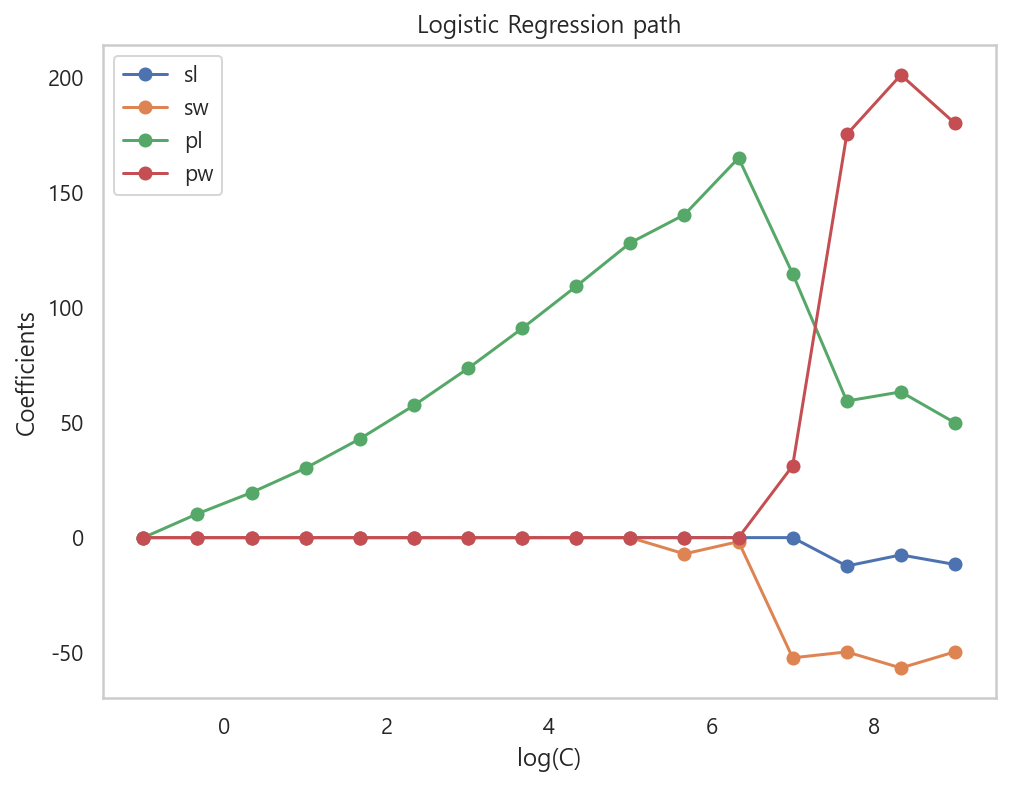

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression path")
plt.axis("tight")
f_names = [name.split(" ")[0][0] + name.split(" ")[1][0] for name in iris.feature_names]
plt.legend(f_names)
plt.grid(False)
plt.show() ; 

In [28]:
f_names = [name.split(" ")[0][0] + name.split(" ")[1][0] for name in iris.feature_names]
f_names

['sl', 'sw', 'pl', 'pw']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

coefs_ = []
scores_ = []
for c in tqdm(cs, desc="lr test : l1 re", mininterval=0.01) : 
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
    scores_.append(clf.score(X, y))

lr test : l1 re: 100%|██████████| 16/16 [00:00<00:00, 422.55it/s]


In [49]:
coefs_ = np.array(coefs_)
coefs_

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  10.35686882,   0.        ],
       [  0.        ,   0.        ,  19.5797793 ,   0.        ],
       [  0.        ,   0.        ,  30.20797812,   0.        ],
       [  0.        ,   0.        ,  42.88595044,   0.        ],
       [  0.        ,   0.        ,  57.4191975 ,   0.        ],
       [  0.        ,   0.        ,  73.47789918,   0.        ],
       [  0.        ,   0.        ,  90.84958963,   0.        ],
       [  0.        ,   0.        , 109.15698772,   0.        ],
       [  0.        ,   0.        , 128.04301299,   0.        ],
       [  0.        ,  -0.3976099 , 146.84725771,   0.        ],
       [  0.        ,   0.        , 166.64700873,   0.        ],
       [ -7.83162371, -49.12040346,  52.78851024, 163.41271731],
       [ -5.58378726, -54.33655075,  62.43696466, 171.81687677],
       [ -7.58316349, -59.20109929,  67.85020458, 187.69903361],
       [-12.77867451, -63

In [50]:
scores_

[0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

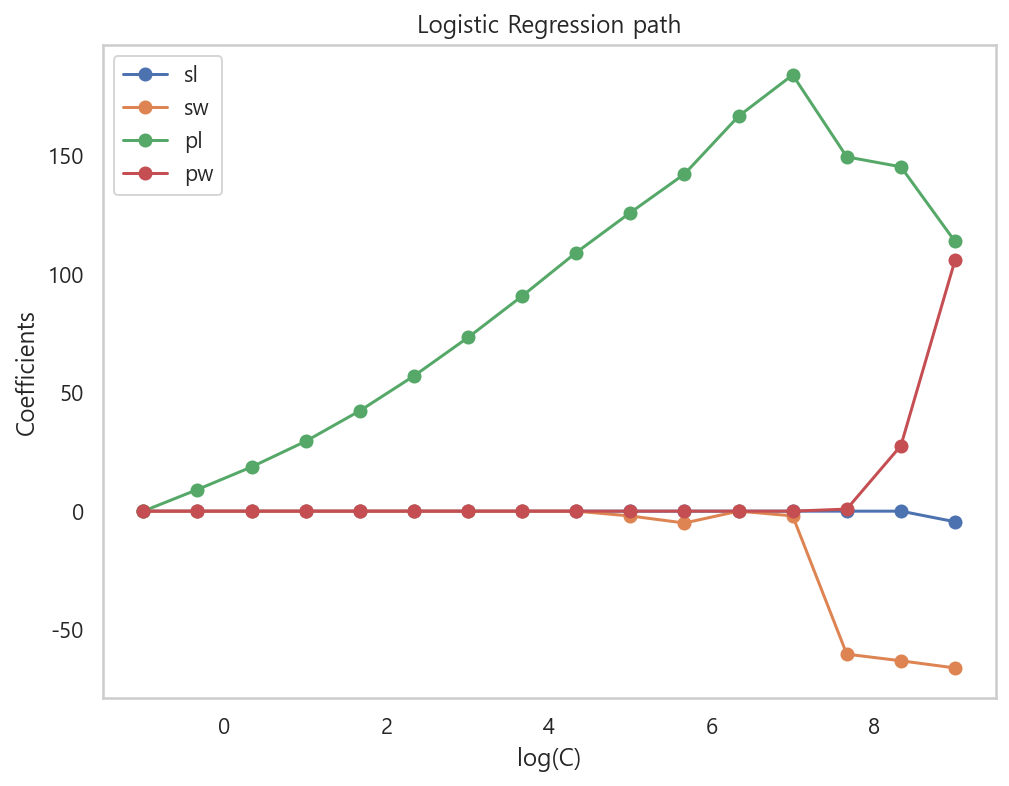

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression path")
plt.axis("tight")
f_names = [name.split(" ")[0][0] + name.split(" ")[1][0] for name in iris.feature_names]
plt.legend(f_names)
plt.grid(False)
plt.show() ; 

## 다중 클래스 문제 적용 : OvR, multinomial 1
- multi_class 인수값으로 ovr과 mulinomial로 설정했을 때의 모델 실험
   - 정확도값이 차이난다.
   - 판결함수의 경계면도 다르게 나타난다.
- multinomial 로지스틱 회귀 모델이 더 정확하고 큰 데이터에서 빠르게 학습한다.   

In [52]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [53]:
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)

X.shape, y.shape

((1000, 2), (1000,))

In [55]:
X[:5]

array([[-5.09227256,  0.87072588],
       [-4.76257213, -0.39181357],
       [-6.3026177 , -0.16682567],
       [ 3.90197303, -0.78399462],
       [ 0.970112  ,  2.18421299]])

In [57]:
transformation = [[0.4, 0.2], [-0.4, 1.2]]
np.dot(X[:5], transformation)

array([[-2.38519938,  0.02641654],
       [-1.74830343, -1.4226907 ],
       [-2.45431681, -1.46071435],
       [ 1.87438706, -0.16039893],
       [-0.48564039,  2.81507798]])

In [58]:
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)
X[:5]

array([[-2.38519938,  0.02641654],
       [-1.74830343, -1.4226907 ],
       [-2.45431681, -1.46071435],
       [ 1.87438706, -0.16039893],
       [-0.48564039,  2.81507798]])

In [63]:
set(y)

{0, 1, 2}

In [60]:
coefs_ = []
for multi_class in ("multinomial", "ovr") : 
    clf = LogisticRegression(solver="sag", max_iter=100, random_state=42,
                            multi_class=multi_class).fit(X, y)
    coefs_.append(clf.coef_)
    
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


In [61]:
coefs_

[array([[-4.51740321, -1.56048296],
        [-0.08918381,  0.72635442],
        [ 4.60658703,  0.83412854]]),
 array([[-4.41615534, -2.23077034],
        [-0.36796618,  1.64022091],
        [ 4.7027708 ,  0.18133443]])]

## 다중 클래스 문제 적용 : OvR, multinomial 2
- 20news groups 사용

In [65]:
import timeit
import warnings

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [66]:
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

In [67]:
t0 = timeit.default_timer()
t0

5311.9984845

In [68]:
solver = "saga"
solver

'saga'

In [69]:
n_samples = 5000
X, y = fetch_20newsgroups_vectorized(subset="all", return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

X.shape, y.shape

((5000, 130107), (5000,))

In [71]:
y

array([17,  7, 10, ...,  8, 18, 10])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                   stratify=y, random_state=42)

In [73]:
from collections import Counter

In [74]:
Counter(y_test).keys(), Counter(y_test).values()

(dict_keys([5, 11, 14, 8, 0, 19, 7, 2, 9, 12, 16, 15, 4, 10, 3, 13, 17, 18, 1, 6]),
 dict_values([23, 29, 28, 26, 22, 15, 27, 26, 27, 24, 24, 27, 26, 26, 25, 26, 26, 21, 27, 25]))

In [75]:
set(y_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [76]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [77]:
train_samples, n_features = X_train.shape
train_samples, n_features

(4500, 130107)

In [79]:
n_classes = np.unique(y).shape[0]
n_classes

20

In [81]:
models = {"ovr": {"name": "One vs Rest", "iters": [1, 2, 3]},
          "multinomial": {"name": "Multinomial", "iters": [1, 2, 5]}}
models

{'ovr': {'name': 'One vs Rest', 'iters': [1, 2, 3]},
 'multinomial': {'name': 'Multinomial', 'iters': [1, 2, 5]}}

In [92]:
for model in models :
    accuracies = [1 / n_classes]
    times = [0]
    densities = [0]
    
    model_params = models[model]
    print("=== solver %s ===" % model)
    
    for this_max_iter in model_params["iters"] :
        
        print(
        "[model=%s, solver=%s] Number of epochs : %s" \
            % (model_params["name"], solver, this_max_iter))
        
        lr = LogisticRegression(
            solver=solver, 
            multi_class=model, 
            penalty="l1", 
            max_iter=this_max_iter,
            random_state=42
        )
        
        t1 = timeit.default_timer()
        lr.fit(X_train, y_train)
        train_time = timeit.default_timer() - t1
        
        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
        
    models[model]["times"] = times
    models[model]["densities"] = densities
    models[model]["accuracies"] = accuracies
    
    print("Test acc for model %s : %.4f" % (model, accuracies[-1]))
    print("%% non-zero coefficient for model %s, per class : \n %s"
         % (model, densities[-1]))
    print("Run time (%i epochs) for model %s : %.2f"
         % (model_params["iters"][-1], model, times[-1]))
        

=== solver ovr ===
[model=One vs Rest, solver=saga] Number of epochs : 1
[model=One vs Rest, solver=saga] Number of epochs : 2
[model=One vs Rest, solver=saga] Number of epochs : 3
Test acc for model ovr : 0.5960
% non-zero coefficient for model ovr, per class : 
 [0.26593496 0.43348936 0.26362917 0.31973683 0.37815029 0.2928359
 0.27054655 0.62717609 0.19522393 0.30897646 0.34586917 0.28207552
 0.34125758 0.29898468 0.34279478 0.59489497 0.38353048 0.35278655
 0.19829832 0.14603365]
Run time (3 epochs) for model ovr : 1.06
=== solver multinomial ===
[model=Multinomial, solver=saga] Number of epochs : 1
[model=Multinomial, solver=saga] Number of epochs : 2
[model=Multinomial, solver=saga] Number of epochs : 5
Test acc for model multinomial : 0.6440
% non-zero coefficient for model multinomial, per class : 
 [0.36047253 0.1268187  0.10606655 0.17985197 0.5395559  0.07993421
 0.06686804 0.21443888 0.11528972 0.2075215  0.10914094 0.11144673
 0.13988486 0.09684337 0.26286057 0.11682692 0.

example run in 1468.364 s


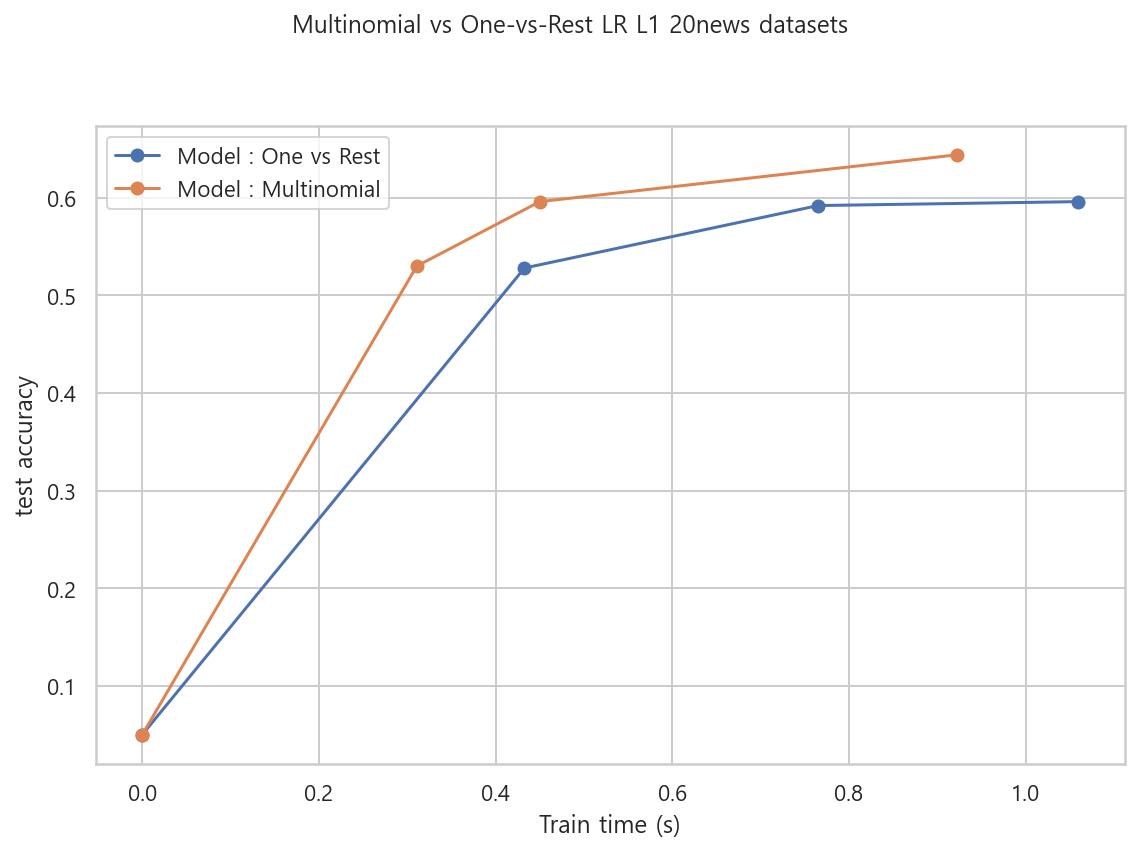

In [95]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

for model in models : 
    name = models[model]["name"]
    times = models[model]["times"]
    accuracies = models[model]["accuracies"]
    
    ax.plot(times, accuracies, marker="o", label="Model : %s" % name)
    ax.set_xlabel("Train time (s)")
    ax.set_ylabel("test accuracy")
    
ax.legend()
fig.suptitle("Multinomial vs One-vs-Rest LR L1 20news datasets")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = timeit.default_timer() - t0
print("example run in %.3f s" % run_time)
plt.show() ; 

In [96]:
models

{'ovr': {'name': 'One vs Rest',
  'iters': [1, 2, 3],
  'times': [0, 0.43261340000026394, 0.7651128000006793, 1.0590320000001157],
  'densities': [0,
   array([0.56184525, 0.7509204 , 0.87927629, 0.747846  , 0.67713497,
          0.5825974 , 0.81087105, 0.70326731, 0.90387143, 1.01916115,
          0.7063417 , 0.66868039, 0.83008601, 0.53494432, 1.14905424,
          0.98534283, 0.70557311, 0.57029983, 0.85698694, 0.86159853]),
   array([0.52341534, 0.82393722, 0.56876263, 0.77013535, 0.46423328,
          0.6679118 , 0.77628414, 0.7071103 , 0.75399479, 0.52418394,
          0.70173011, 0.60642394, 0.747846  , 0.47499366, 0.47115067,
          0.48498544, 0.78858171, 0.88235068, 0.52495254, 0.4588531 ]),
   array([0.26593496, 0.43348936, 0.26362917, 0.31973683, 0.37815029,
          0.2928359 , 0.27054655, 0.62717609, 0.19522393, 0.30897646,
          0.34586917, 0.28207552, 0.34125758, 0.29898468, 0.34279478,
          0.59489497, 0.38353048, 0.35278655, 0.19829832, 0.14603365])],
  '

## iamge clf test

In [1]:
from glob import glob

In [2]:
paths = glob(
    "../../../04_machine_learning/SimpleImageDataset/SimpleImageDataset/*.jpg")
paths[:5]

['../../../04_machine_learning/SimpleImageDataset/SimpleImageDataset\\building00.jpg',
 '../../../04_machine_learning/SimpleImageDataset/SimpleImageDataset\\building01.jpg',
 '../../../04_machine_learning/SimpleImageDataset/SimpleImageDataset\\building02.jpg',
 '../../../04_machine_learning/SimpleImageDataset/SimpleImageDataset\\building03.jpg',
 '../../../04_machine_learning/SimpleImageDataset/SimpleImageDataset\\building04.jpg']

In [3]:
labels = [ele[67:-len("00.jpg")] for ele in paths]
ids = [ele[-6:-4] for ele in paths]

len(labels), len(ids)

(90, 90)

In [5]:
labels[:5], ids[:5]

(['building', 'building', 'building', 'building', 'building'],
 ['00', '01', '02', '03', '04'])

In [18]:
from skimage.transform import resize
import mahotas as mh
from tqdm import tqdm

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

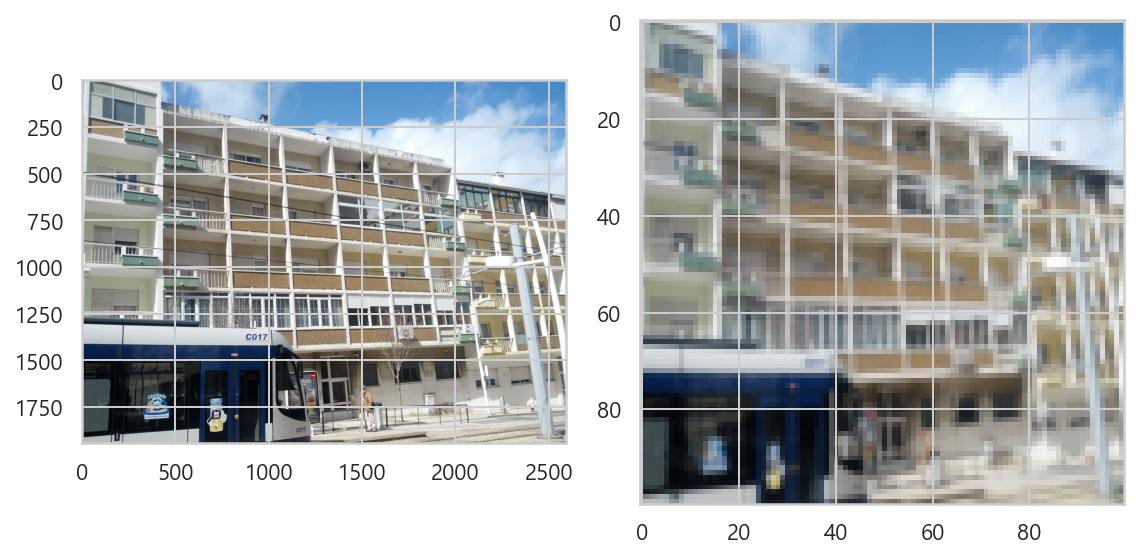

In [21]:
sample = mh.imread(paths[0])
resize_sample = resize(sample, (100, 100, 3))

plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(sample)

plt.subplot(122)
plt.imshow(resize_sample)

plt.tight_layout()
plt.show() ;

In [22]:
resize_images = []
hara_imgs = []
g_h_imgs = []


for p in tqdm(paths, desc="trans img", mininterval=0.01) :
    img = mh.imread(p)
    resize_img = resize(img, (100, 100, 3)).reshape(100*100*3)
    resize_images.append(resize_img)

    h_img = mh.features.haralick(img)
    hara_imgs.append(h_img.ravel())    
    
    g_img = mh.colors.rgb2gray(img, dtype=np.uint8)
    g_h_img = mh.features.haralick(g_img)
    g_h_imgs.append(g_h_img.ravel())

trans img: 100%|██████████| 90/90 [04:16<00:00,  2.85s/it]


In [24]:
resize_imgs = np.array(resize_images)
hara_imgs = np.array(hara_imgs)
g_h_imgs = np.array(g_h_imgs)

resize_imgs.shape, hara_imgs.shape, g_h_imgs.shape

((90, 30000), (90, 169), (90, 52))

In [26]:
arr_labels = np.array(labels)
arr_labels

array(['building', 'building', 'building', 'building', 'building',
       'building', 'building', 'building', 'building', 'building',
       'building', 'building', 'building', 'building', 'building',
       'building', 'building', 'building', 'building', 'building',
       'building', 'building', 'building', 'building', 'building',
       'building', 'building', 'building', 'building', 'building',
       'scene', 'scene', 'scene', 'scene', 'scene', 'scene', 'scene',
       'scene', 'scene', 'scene', 'scene', 'scene', 'scene', 'scene',
       'scene', 'scene', 'scene', 'scene', 'scene', 'scene', 'scene',
       'scene', 'scene', 'scene', 'scene', 'scene', 'scene', 'scene',
       'scene', 'scene', 'text', 'text', 'text', 'text', 'text', 'text',
       'text', 'text', 'text', 'text', 'text', 'text', 'text', 'text',
       'text', 'text', 'text', 'text', 'text', 'text', 'text', 'text',
       'text', 'text', 'text', 'text', 'text', 'text', 'text', 'text'],
      dtype='<U8')

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import (accuracy_score, classification_report)

In [36]:
def get_scaling(X) : 

    ss = StandardScaler()
    ss.fit(hara_imgs)
    ss_X = ss.transform(hara_imgs)

    return ss_X

In [37]:
ss_hara = get_scaling(hara_imgs)

X_train, X_test, y_train, y_test = train_test_split(
    ss_hara, arr_labels, test_size=0.2, stratify=arr_labels, random_state=42)

np.unique(y_test, return_counts=True)

(array(['building', 'scene', 'text'], dtype='<U8'),
 array([6, 6, 6], dtype=int64))

In [38]:
model = LogisticRegression(
    solver="liblinear", penalty="l1", multi_class="ovr", random_state=42)
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', penalty='l1', random_state=42,
                   solver='liblinear')

In [39]:
accuracy_score(y_test, model.predict(X_test))

0.9444444444444444

In [40]:
acc = cross_val_score(model, ss_hara, arr_labels, cv=5, scoring="accuracy").mean()
acc

0.8444444444444444

In [41]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

    building       0.86      1.00      0.92         6
       scene       1.00      0.83      0.91         6
        text       1.00      1.00      1.00         6

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



## pipe + gridcv

In [76]:
pipe = Pipeline([("scaler", StandardScaler()),
                ("clf", LogisticRegression(random_state=42))])

params = {"clf__solver": ["liblinear", "lbgfs", "sag", "saga", "newton-cg"],
          "clf__penalty": ["l1", "l2", "none"],
          "clf__multi_class": ["ovr", "multinomial"],
          "clf__max_iter": [50, 100, 200]}

grid_cv = GridSearchCV(pipe, param_grid=params, scoring="accuracy", cv=5)
grid_cv.fit(ss_hara, arr_labels)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        LogisticRegression(random_state=42))]),
             param_grid={'clf__max_iter': [50, 100, 200],
                         'clf__multi_class': ['ovr', 'multinomial'],
                         'clf__penalty': ['l1', 'l2', 'none'],
                         'clf__solver': ['liblinear', 'lbgfs', 'sag', 'saga',
                                         'newton-cg']},
             scoring='accuracy')

In [77]:
grid_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(max_iter=50, multi_class='multinomial',
                                    random_state=42, solver='saga'))])

In [78]:
cv_df = pd.DataFrame(grid_cv.cv_results_)
cv_df[["param_clf__solver", "param_clf__multi_class", "param_clf__penalty", "param_clf__max_iter",
       "mean_test_score", "rank_test_score"]].sort_values("rank_test_score", ascending=True)[:20]

,param_clf__solver,param_clf__multi_class,param_clf__penalty,param_clf__max_iter,mean_test_score,rank_test_score
53,saga,multinomial,l2,100,0.855556,1
23,saga,multinomial,l2,50,0.855556,1
28,saga,multinomial,none,50,0.844444,3
0,liblinear,ovr,l1,50,0.833333,4
63,saga,ovr,l1,200,0.833333,4
60,liblinear,ovr,l1,200,0.833333,4
59,newton-cg,multinomial,none,100,0.833333,4
30,liblinear,ovr,l1,100,0.833333,4
29,newton-cg,multinomial,none,50,0.833333,4
22,sag,multinomial,l2,50,0.833333,4


In [69]:
grid_cv = GridSearchCV(pipe, param_grid=params, scoring="accuracy", cv=5)
grid_cv.fit(g_h_imgs, arr_labels)
cv_df = pd.DataFrame(grid_cv.cv_results_)
cv_df[["param_clf__solver", "param_clf__multi_class", "param_clf__penalty", "param_clf__max_iter",
       "mean_test_score", "rank_test_score"]].sort_values("rank_test_score", ascending=True)[:20]

,param_clf__solver,param_clf__multi_class,param_clf__penalty,param_clf__max_iter,mean_test_score,rank_test_score
88,saga,multinomial,none,200,0.877778,1
57,sag,multinomial,none,100,0.877778,1
72,sag,ovr,none,200,0.877778,1
44,newton-cg,ovr,none,100,0.877778,4
14,newton-cg,ovr,none,50,0.877778,4
74,newton-cg,ovr,none,200,0.877778,4
42,sag,ovr,none,100,0.866667,7
54,newton-cg,multinomial,l2,100,0.866667,7
24,newton-cg,multinomial,l2,50,0.866667,7
73,saga,ovr,none,200,0.866667,7


## pca data

In [88]:
from sklearn.decomposition import PCA

In [89]:
def get_pca(data, n_com=100) : 
    
    pca = PCA(n_components=n_com)
    pca.fit(data)
    pca_data = pca.transform(data)
    
    return pca_data, pca

In [90]:
def get_pca_var_ratio(pca) : 
    
    print("pca variance ratio : ", np.sum(pca.explained_variance_ratio_))

In [97]:
pca_data, pca = get_pca(resize_imgs, n_com=85)
get_pca_var_ratio(pca)

pca variance ratio :  0.9991381544230173


In [98]:
grid_cv = GridSearchCV(pipe, param_grid=params, scoring="accuracy", cv=5)
grid_cv.fit(pca_data, arr_labels)
cv_df = pd.DataFrame(grid_cv.cv_results_)
cv_df[["param_clf__solver", "param_clf__multi_class", "param_clf__penalty", "param_clf__max_iter",
       "mean_test_score", "rank_test_score"]].sort_values("rank_test_score", ascending=True)[:20]

,param_clf__solver,param_clf__multi_class,param_clf__penalty,param_clf__max_iter,mean_test_score,rank_test_score
63,saga,ovr,l1,200,0.766667,1
0,liblinear,ovr,l1,50,0.755556,2
60,liblinear,ovr,l1,200,0.755556,2
30,liblinear,ovr,l1,100,0.755556,2
48,saga,multinomial,l1,100,0.733333,5
33,saga,ovr,l1,100,0.733333,5
78,saga,multinomial,l1,200,0.722222,7
3,saga,ovr,l1,50,0.722222,8
18,saga,multinomial,l1,50,0.700000,9
27,sag,multinomial,none,50,0.300000,10
